# Introduction to Natural Language Processing in Python

## Regular expressions & word tokenization

In this course, you'll learn natural language processing (NLP) basics, such as how to identify and separate words, how to extract topics in a text, and how to build your own fake news classifier. You'll also learn how to use basic libraries such as NLTK, alongside libraries which utilize deep learning to solve common NLP problems. This course will give you the foundation to process and parse text as you move forward in your Python learning.

In [1]:
import re

** Practicing regular expressions: re.split() and re.findall()**

Now you'll get a chance to write some regular expressions to match digits, strings and non-alphanumeric characters. Take a look at my_string first by printing it in the IPython Shell, to determine how you might best match the different steps.

Note: It's important to prefix your regex patterns with r to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings. For example, "\n" in Python is used to indicate a new line, but if you use the r prefix, it will be interpreted as the raw string "\n" - that is, the character "\" followed by the character "n" - and not as a new line.

In [2]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [3]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


In [4]:
scene = open("grail.txt", "r")
scene_one = scene.read()

In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Word tokenization with NLTK

In [7]:
# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'favor', 'walking', 'never', 'last', 'twenty', 'auntie', 'because', 'guiding', 'Just', 'finest', 'hidden', 'One', 'beat', 'acting', 'brain', 'been', 'round', 'mate', 'Please', 'Did', 'legs', 'Ulk', 'disheartened', 'raised', 'bugger-folk', 'soon', 'back', 'many', 'Haw', 'having', 'go', "'is", 'Mind', 'feint', 'left', 'you', 'thanks', 'Augh', 'bitching', 'sweet', 'another', 'Beast', 'language', 'least', 'creeper', 'SHRUBBER', 'Prince', 'ptoo', 'do', 'Even', 'ever', 'yet', 'wings', 'Oh', 'no', 'private', 'boil', 'Father', 'suffered', 'into', 'her', 'only', 'STUNNER', 'seem', 'looking', 'curtains', 'throughout', 'Unfortunately', 'ours', 'refuse', 'tracts', 'return', 'spam', 'welcome', 'what', 'killer', 'fair', 'clap', 'thwonk', 'That', 'Today', 'LUCKY', 'king-a', 'there', 'shrubbery', 'nose', 'Would', 'foul', 'profane', 'cope', 'girl', 'halves', '9', 'Camaaaaaargue', 'scratch', 'given', 'Tower', 'relax', 'kills', "'S", 'act', 'Excalibur', 'case', 'boys', 'bed-wetting', 'knows', 'remain', 

limit_output extension: Maximum message size of 10000 exceeded with 20439 characters

### More regex with re.search()

In [8]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.search(pattern2, sentences[3]))

580 588
<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>
<re.Match object; span=(0, 7), match='ARTHUR:'>


### Regex with NLTK tokenization

Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. The nltk.tokenize.TweetTokenizer class gives you some extra methods and attributes for parsing tweets.

In [9]:
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [10]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [11]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [12]:
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@|#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [13]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer(tweets)
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


### Non-ascii tokenization

In [14]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [15]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


### Charting world length with NLTK

In [16]:
import matplotlib.pyplot as plt

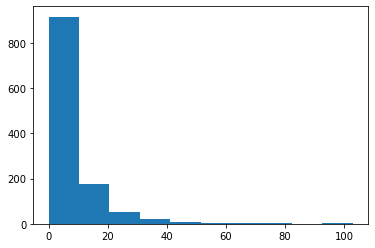

In [17]:
# Split the script into lines: lines
lines = scene_one.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

# Topic Identification

## Building a Counter with bag-of-words

In [18]:
article_title = open("wiki_text_debugging.txt", 'r')
article = article_title.read()

In [19]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 66), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


## Text preprocessing practice

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anoop\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Error with downloaded zip file
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

english_stops = stopwords.words('english')

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]
